In [0]:
# !git config --global user.email "me@example.com"
# !git config --global user.name "nervuzz"
# !git commit -m 'Day 3'
# !git pull
# !git add .
# !git status
# !git push

In [10]:
cd "drive/My Drive/Colab Notebooks/data_workshop_car/"

/content/drive/My Drive/Colab Notebooks/data_workshop_car


In [0]:
# !pip install --upgrade tables
# !pip install eli5

In [0]:
import eli5
import numpy as np
import pandas as pd
from eli5.sklearn import PermutationImportance
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score


# Data loading section

In [25]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

# Dummy model

In [12]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [16]:
feats = ['car_id']
X = df[ feats ].values
y = df[ ['price_value'] ].values

model = DummyRegressor()
model.fit(X, y)
y_pred = model.predict(X)

mae(y, y_pred)

39465.934630440985

Remove rows where price in EUR

In [26]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [27]:
df = df[ df['price_currency'] != 'EUR' ]
df.shape

(106290, 155)

# Features
  

In [0]:
CAT_SUFFIX = '__cat'

for feat in df.columns:
  if not isinstance(df[feat][0] , list):
    factorized_values = df[feat].factorize()[0]
    if CAT_SUFFIX in feat:
      df[feat] = factorized_values
    else:
      df[ feat + CAT_SUFFIX ] = factorized_values

In [35]:
cat_feats = [x for x in df.columns if CAT_SUFFIX in x and 'price' not in str(x).lower()]
len(cat_feats)

151

# Better model

In [42]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368324

In [44]:
m = model = DecisionTreeRegressor(max_depth=5)
m.fit(X, y)

imp = PermutationImportance(m).fit(X, y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2557 ± 0.0099,param_napęd__cat
0.2071 ± 0.0105,param_faktura-vat__cat
0.1928 ± 0.0076,param_stan__cat
0.1445 ± 0.0043,param_rok-produkcji__cat
0.0640 ± 0.0025,param_moc__cat
0.0419 ± 0.0006,feature_kamera-cofania__cat
0.0412 ± 0.0015,param_skrzynia-biegów__cat
0.0291 ± 0.0043,param_marka-pojazdu__cat
0.0193 ± 0.0019,param_pojemność-skokowa__cat
0.0164 ± 0.0005,feature_bluetooth__cat


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5539c76358>,
      dtype=object)

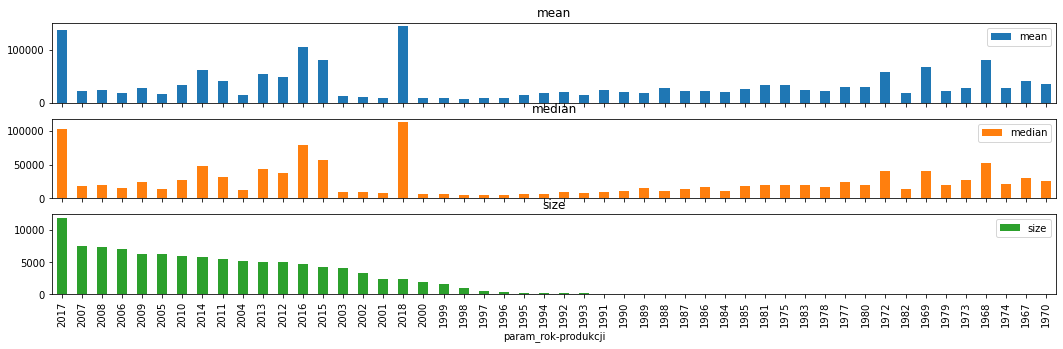

In [47]:
(
  df
 .groupby('param_rok-produkcji')['price_value']
 .agg([np.mean, np.median, np.size])
 .sort_values(by= 'size', ascending=False)
 .head(50)
).plot(kind='bar', figsize=(18,5), subplots=True)

In [55]:
# !git pull
# !git status
# !git add .
# !git status
# !git config --global user.email "me@example.com"
# !git config --global user.name "nervuzz"
# !git commit -m 'Day 3'
# !git push

[master d309aaf] Day 3
 2 files changed, 2 insertions(+), 1 deletion(-)
 create mode 100644 day3.ipynb
fatal: could not read Password for 'https://16d6f392d153c1d01a7f839844eec1efcdd5fe91@github.com': No such device or address
